![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Heatmap DateTime
</b>
</span>

---
**Notebook version**: `1` (25 Mar 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plots heatmap showing values (z) of time series as date (y) vs time (x).
- Time series must have date and time info in index.
- This example uses 10 years of air temperature measurements, recorded at half-hourly time resolution.
- Since this class uses diive's `TimestampSanitizer` class, it is important that the timestamp of the input data is correctly named, i.e., `TIMESTAMP_START`, `TIMESTAMP_MIDDLE` or `TIMESTAMP_END`.
- These timestamp names are strictly required, because a timestamp index simply named `TIMESTAMP` does not give info about start and end of the respective averaging interval.
- `HeatmapDateTime` uses `HeatmapBase` (`diive.core.plotting.heatmap_base.HeatmapBase`) as base class.

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.0


In [2]:
# help(HeatmapDateTime)

</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
series_30min = df['Tair_f']
series_30min

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.051 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

In [4]:
# series_30min.plot();

</br>

# (1) **Plot heatmap with half-hourly data**

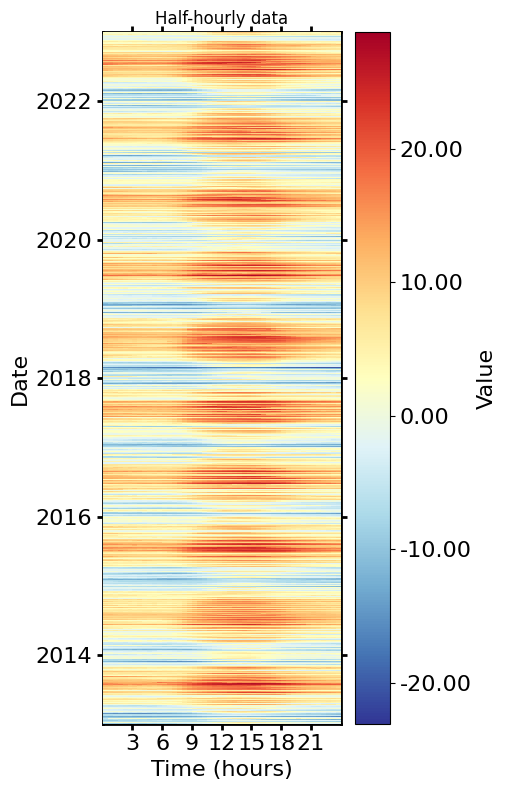

In [5]:
hm = HeatmapDateTime(
    series=series_30min,
    title="Half-hourly data",    
    figsize=(5, 8)
)
hm.show()

## Get ax in which the plot was generated

In [6]:
this_ax = hm.get_ax()
this_ax

<Axes: title={'center': 'Half-hourly data'}, xlabel='Time (hours)', ylabel='Date'>

## Get data that was used to create the plot

In [7]:
plot_df = hm.get_plot_data()
plot_df

x_vals,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,05:00:00,05:30:00,06:00:00,06:30:00,07:00:00,...,16:30:00,17:00:00,17:30:00,18:00:00,18:30:00,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
y_vals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,-1.618,-1.630,-1.644,-1.657,-0.567,-0.200,-0.100,-0.300,-1.600,-1.267,-1.700,-1.400,-2.267,-1.900,-1.067,...,-0.167,-0.400,-1.333,-1.333,-1.800,-2.100,-1.833,-1.733,-1.667,-1.600,-1.800,-1.867,-2.133,-2.433,-2.100
2013-01-02,-2.333,-3.100,-3.567,-3.600,-3.800,-3.833,-4.100,-4.133,-3.933,-4.067,-4.200,-3.967,-4.033,-4.033,-3.967,...,-4.600,-4.933,-5.467,-6.100,-6.100,-7.233,-7.667,-7.600,-8.067,-8.367,-9.033,-8.900,-8.833,-8.467,-9.233
2013-01-03,-9.133,-9.167,-9.267,-9.100,-9.433,-9.767,-8.900,-9.167,-9.267,-8.333,-8.633,-7.833,-7.700,-7.733,-7.333,...,0.467,0.333,0.567,0.267,0.000,-0.733,-1.100,-1.367,-2.200,-2.633,-2.367,-1.800,-2.033,-2.233,-1.967
2013-01-04,-1.367,-0.400,-1.100,-0.433,-0.367,-0.233,0.233,0.433,0.500,0.667,0.700,0.767,1.667,1.333,0.800,...,1.067,0.800,1.000,0.700,0.533,0.567,0.833,0.533,0.567,0.467,0.400,0.500,0.267,0.333,0.267
2013-01-05,0.667,0.067,0.300,0.433,0.767,0.367,0.500,0.767,0.700,0.733,0.467,0.433,0.400,0.933,0.100,...,0.167,-0.433,-0.033,0.600,0.733,0.567,0.467,0.333,-0.400,-0.700,-0.667,-1.100,-1.000,-0.967,-0.967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.003,0.050,0.080,0.000,-0.027,-0.140,-0.323,-0.600,-0.593,-0.600,-0.570,-0.610,-0.710,-0.870,-0.977,...,-1.763,-1.800,-1.730,-1.967,-1.960,-2.157,-2.240,-2.847,-3.113,-3.383,-3.707,-3.987,-4.323,-4.597,-4.753
2022-12-28,-5.177,-5.077,-4.893,-4.790,-5.237,-5.313,-4.680,-4.753,-4.563,-4.183,-4.133,-4.227,-4.123,-4.367,-4.430,...,0.727,0.320,-0.360,-0.167,-0.400,-0.560,-1.630,-1.907,-2.393,-1.620,-1.337,-0.700,-1.723,-1.580,-1.570
2022-12-29,-2.127,-2.167,-1.873,-1.883,-1.857,-1.797,-1.877,-1.960,-2.060,-2.303,-1.807,-2.180,-2.080,-1.300,-1.883,...,1.997,1.983,1.413,1.547,0.770,0.457,1.240,0.813,1.343,0.963,1.680,1.873,2.210,2.110,1.643


</br>

# (2) **Plot heatmap with hourly data**

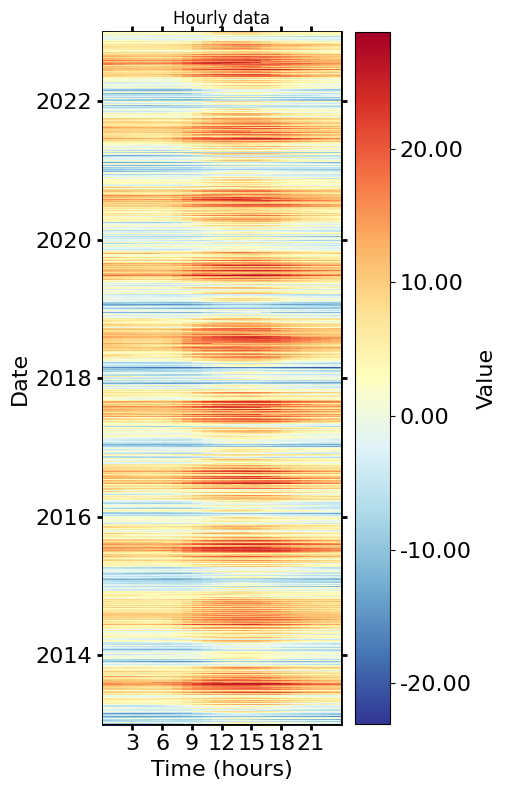

In [8]:
# Resample example data to hourly time resolution
series_1h = series_30min.resample('1h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_1h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_1h,
    title="Hourly data",
    figsize=(5, 8)
)
hm.show()

</br>

# (3) **Plot heatmap with 6-hourly data**

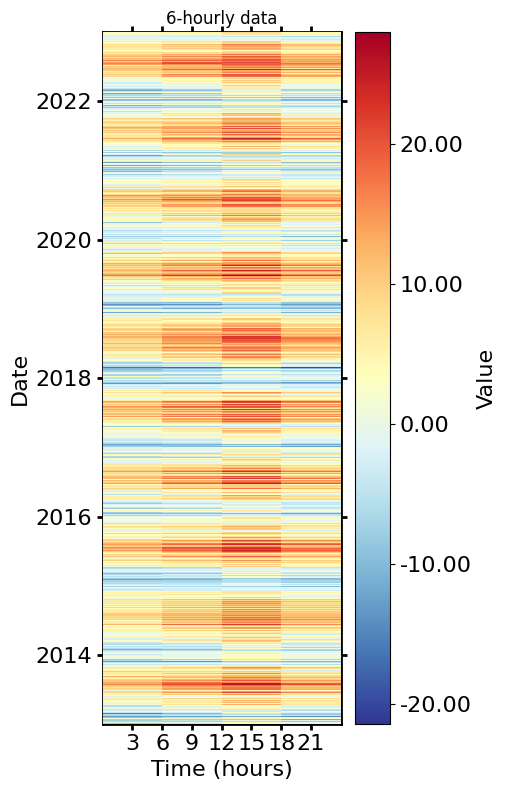

In [9]:
# Resample example data to 6-hourly time resolution
series_6h = series_30min.resample('6h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_6h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_6h,
    title="6-hourly data",
    figsize=(5, 8)
)
hm.show()

In [10]:
hm.get_plot_data()

x_vals,00:00:00,06:00:00,12:00:00,18:00:00
y_vals,,,,
2013-01-01,-1.140250,-1.091667,1.119500,-1.866583
2013-01-02,-3.719417,-3.911250,-4.400083,-7.966667
2013-01-03,-9.000000,-4.458333,1.033333,-1.513833
2013-01-04,-0.050000,1.164000,1.583333,0.497250
2013-01-05,0.516750,0.244500,0.536167,-0.258417
...,...,...,...,...
2022-12-27,-0.278000,-0.849250,-1.183083,-3.252833
2022-12-28,-4.752167,-2.753167,1.233667,-1.298917
2022-12-29,-1.990917,-0.775417,2.454500,1.387417


</br>

# (4) **Plot heatmap with 12-hourly data**

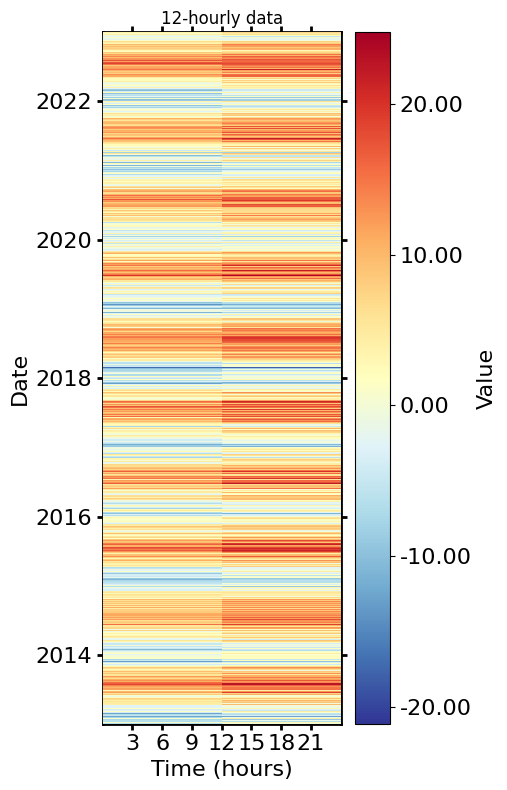

In [11]:
# Resample example data to 12-hourly time resolution
series_12h = series_30min.resample('12h', label='left').mean()

# Resampling creates the label left, therefore the appropriate name of
# the timestamp index is TIMESTAMP_START
series_12h.index.name = 'TIMESTAMP_START'

hm = HeatmapDateTime(
    series=series_12h,
    title="12-hourly data",
    figsize=(5, 8)
)
hm.show()

</br>

# (5) **Plot multiple heatmaps in one figure**

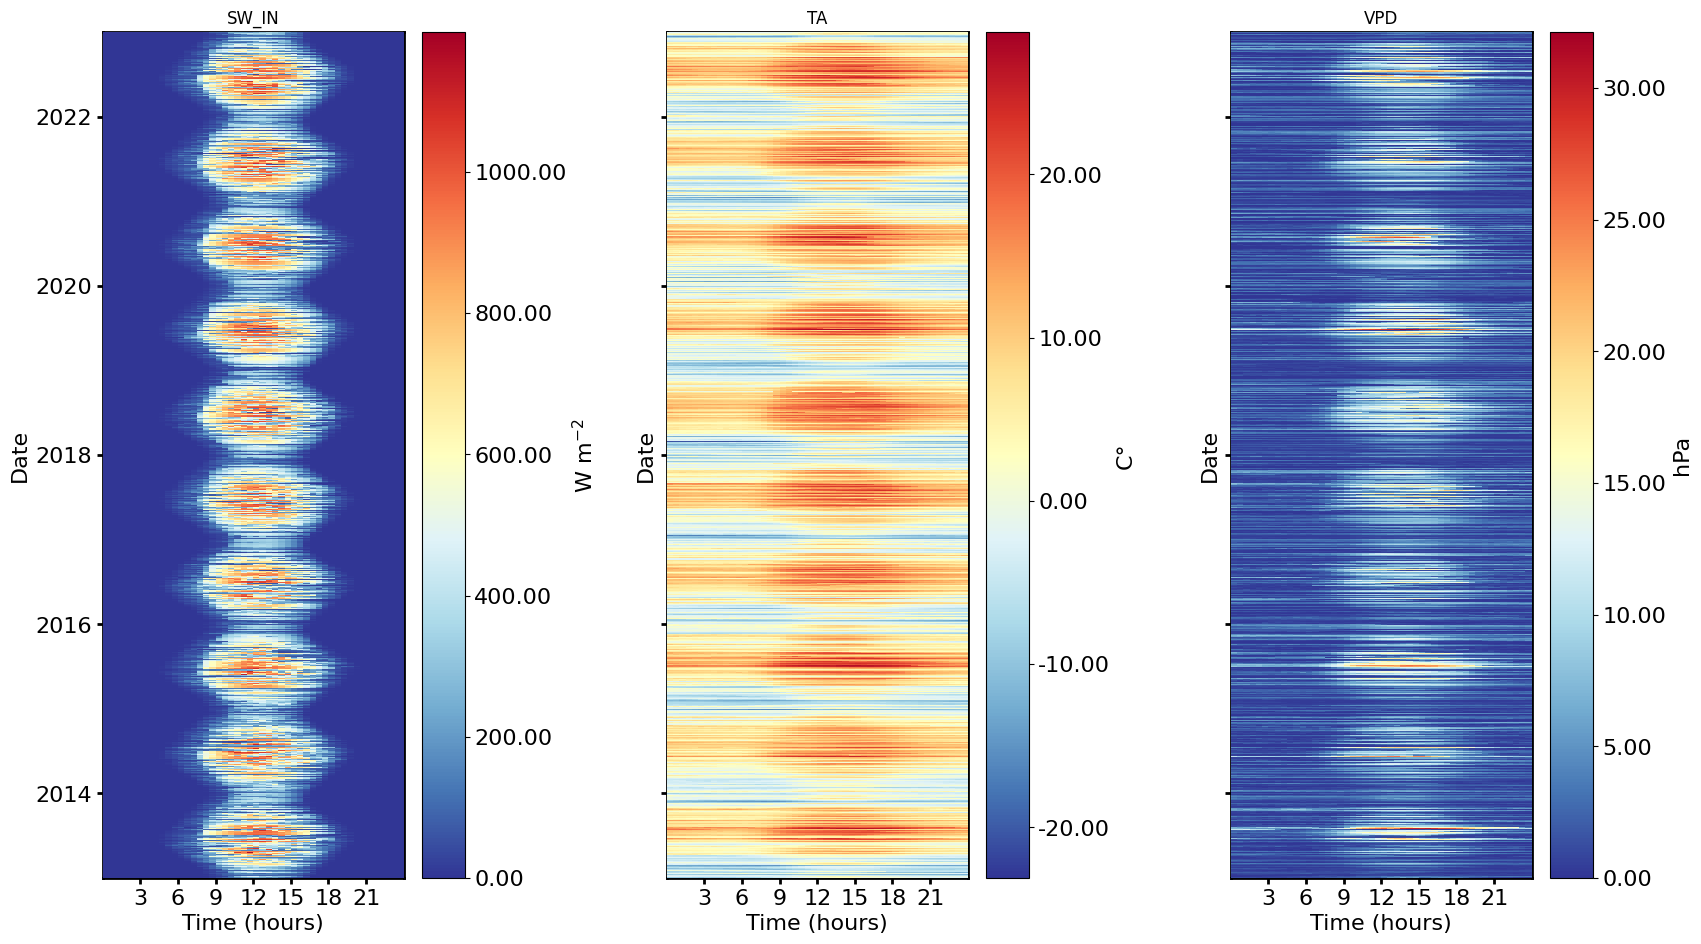

In [12]:
# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 3)  # rows, cols
gs.update(wspace=0.5, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_swin = fig.add_subplot(gs[0, 0])
ax_ta = fig.add_subplot(gs[0, 1])
ax_vpd = fig.add_subplot(gs[0, 2])

HeatmapDateTime(ax=ax_swin, series=df['Rg_f'], zlabel="$\mathrm{W\ m^{-2}}$").plot()
HeatmapDateTime(ax=ax_ta, series=df['Tair_f'], zlabel="C°").plot()
HeatmapDateTime(ax=ax_vpd, series=df['VPD_f'], zlabel="hPa").plot()

ax_swin.set_title("SW_IN", color='black')
ax_ta.set_title("TA", color='black')
ax_vpd.set_title("VPD", color='black')

ax_swin.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_vpd.tick_params(left=True, right=False, top=False, bottom=True,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=True)
fig.show()

</br>

# **End of notebook**

In [13]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-01-25 01:41:53
